In [26]:
# load libraries and scripts
include("../scripts/tools.jl")
include("../scripts/plotting.jl")
include("../scripts/get_grid.jl")
include("../scripts/get_params.jl")
include("../scripts/stable.jl")
include("../scripts/dynamics.jl")
include("../scripts/disturbances.jl")

local_disturbance (generic function with 1 method)

In [2]:
include("../scripts/get_grid.jl")
#load borders
border, scale_factor = import_border("../data/borders/border.json")

dx = 0.01
Nx, Ny, coord, isinside, isborder, isgrid, n = get_grid(border, dx)

(105, 79, [-0.404950144084045 -0.6233270799121987; -0.394950144084045 -0.6233270799121987; … ; 0.365049855915955 0.4166729200878013; 0.375049855915955 0.4166729200878013], Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [10.0 3.0 -1.0 -1.0; 11.0 3.0 0.0 -1.0; … ; 37.0 102.0 0.0 1.0; 38.0 102.0 1.0 1.0])

In [3]:
# compute or load grid parameters
include("../scripts/get_params.jl")
minv, gamma, p, xi, bx, by, m, d = get_params_diff_fast(isinside, isgrid, n, Ny, Nx, Float64(dx), coord, scale_factor, "../data/disc/pantagruel.h5",
    "../numerics/grid_params_" * string(dx) * ".h5", Niter=10, dmax = 0.01, patch=20.0, bmin=50.0, tau=0.00001);

  2.106945 seconds (3.64 M allocations: 4.691 GiB, 7.37% gc time, 6.75% compilation time)
  0.470815 seconds (271.99 k allocations: 273.533 MiB, 6.10% gc time, 46.81% compilation time)


In [4]:
#minimum(bx[isgrid])
#minimum(by[isgrid])
println(size(minv))
println(size(gamma))
println(size(xi))
println(size(p))
println(size(bx))
println(size(by))
println(size(m))
println(size(d))

(3854,)
(3854,)
(3854, 3854)
(3854,)
(8295,)
(8295,)
(8295,)
(8295,)


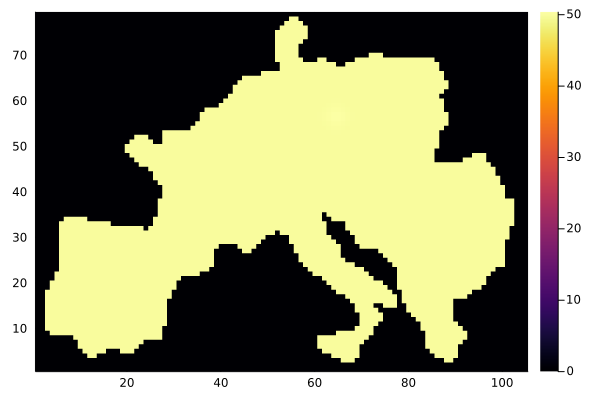

In [5]:
heatmap(reshape(by,Ny,Nx))

In [7]:
include("../scripts/stable.jl")
th = compute_stable_sol(isinside, n, bx, by, p, interval = 1000, Niter = 40000, tol = 1e-7)

[1000.0 0.000565590506965823]
[2000.0 0.0004367862163041636]
[3000.0 0.0002950105212495835]
[4000.0 0.00019965791385412324]
[5000.0 0.00013825652745635963]
[6000.0 9.87884146423923e-5]
[7000.0 7.332876089138907e-5]
[8000.0 5.694438991543649e-5]
[9000.0 5.1949039735377234e-5]
[10000.0 4.784352854403373e-5]
[11000.0 4.4432056735099756e-5]
[12000.0 4.1577664303793505e-5]
[13000.0 3.91797398894278e-5]
[14000.0 3.716101092776647e-5]
[15000.0 3.5459970657680806e-5]
[16000.0 3.402637825600241e-5]
[17000.0 3.2818485790508944e-5]
[18000.0 3.180123834034543e-5]
[19000.0 3.094503054124065e-5]
[20000.0 3.0224790995236894e-5]
[21000.0 2.9619269598435416e-5]
[22000.0 2.9110459123127264e-5]
[23000.0 2.8683112578642422e-5]
[24000.0 2.832433393606948e-5]
[25000.0 2.8023228206053297e-5]
[26000.0 2.7770601351506663e-5]
[27000.0 2.755870287751705e-5]
[28000.0 2.738100536703314e-5]
[29000.0 2.7232016047706864e-5]
[30000.0 2.7107116134073017e-5]
[31000.0 2.7002424166533423e-5]
[32000.0 2.6914680029799243e-5

8295-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

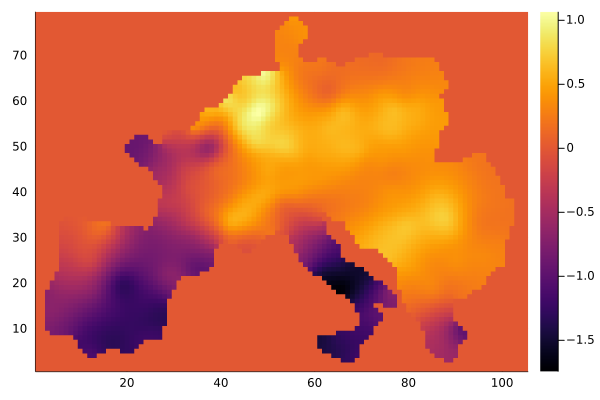

In [8]:
heatmap(reshape(th,Ny,Nx))

In [30]:
ts, thetas, omegas = perform_dyn_sim(isgrid, xi, p, minv, gamma, th, interval=100, Ndt=20000, dt=0.1, method="crank-nicolson")

Total time: 2000.0
NIter: 100 Avg. Omega: 0.007476991420922291
NIter: 200 Avg. Omega: 0.01625901938028769
NIter: 300 Avg. Omega: -0.003869625928096004
NIter: 400 Avg. Omega: 0.006493065258524946
NIter: 500 Avg. Omega: -0.001125568107053989
NIter: 600 Avg. Omega: -0.0006630921539742838
NIter: 700 Avg. Omega: -0.001181600246595231
NIter: 800 Avg. Omega: 0.0016572534780853671
NIter: 900 Avg. Omega: 0.00039392171678637335
NIter: 1000 Avg. Omega: -0.0009724867722640957
NIter: 1100 Avg. Omega: 9.0662370887011e-5
NIter: 1200 Avg. Omega: -0.00011622085453423025
NIter: 1300 Avg. Omega: -0.0001999681971587452
NIter: 1400 Avg. Omega: -7.424421552402695e-5
NIter: 1500 Avg. Omega: -0.0005652562471972518
NIter: 1600 Avg. Omega: -0.00011284015658125969
NIter: 1700 Avg. Omega: -0.00013975343199603544
NIter: 1800 Avg. Omega: 0.00014703119747793778
NIter: 1900 Avg. Omega: -0.00018651775163539783
NIter: 2000 Avg. Omega: -0.00044713008983706347
NIter: 2100 Avg. Omega: -0.00029921701517874596
NIter: 2200 A

NIter: 17700 Avg. Omega: -2.883046390949813e-7
NIter: 17800 Avg. Omega: 1.0716867285787129e-7
NIter: 17900 Avg. Omega: -9.507944255984066e-7
NIter: 18000 Avg. Omega: -1.8043281201605583e-8
NIter: 18100 Avg. Omega: 1.2741552877039993e-7
NIter: 18200 Avg. Omega: -1.818111360368761e-8
NIter: 18300 Avg. Omega: 6.564152820027871e-8
NIter: 18400 Avg. Omega: 1.1568907693664741e-7
NIter: 18500 Avg. Omega: 1.7963621534495403e-7
NIter: 18600 Avg. Omega: -6.199124063326144e-7
NIter: 18700 Avg. Omega: 2.2272031172557635e-7
NIter: 18800 Avg. Omega: -5.646010622579007e-7
NIter: 18900 Avg. Omega: -4.651559627232129e-7
NIter: 19000 Avg. Omega: -3.749013261805081e-7
NIter: 19100 Avg. Omega: -1.9458730510176697e-7
NIter: 19200 Avg. Omega: -1.7201157628804612e-7
NIter: 19300 Avg. Omega: 1.0007730803123559e-7
NIter: 19400 Avg. Omega: 4.367882118169862e-7
NIter: 19500 Avg. Omega: 2.715853161006778e-7
NIter: 19600 Avg. Omega: 1.6288113229243454e-7
NIter: 19700 Avg. Omega: -2.905450417550565e-7
NIter: 19800 

([0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0  …  1910.0, 1920.0, 1930.0, 1940.0, 1950.0, 1960.0, 1970.0, 1980.0, 1990.0, 2000.0], [-0.774170591857902 -0.32855347452672606 … -0.3096401993743061 -0.3096399913155626; -0.7535959965888487 -0.3013899844399113 … -0.28903845587573507 -0.2890382856824087; … ; 0.19315919457264433 0.37699257096756017 … 0.6587360238894383 0.6587364220432474; 0.19443641709824497 0.3775584700409282 … 0.6600405292488009 0.6600400761036177], [0.0 -0.4668566180837764 … 0.0002340210762974011 -0.00010577732684554325; 0.0 -0.19154301229694473 … -3.43889436584406e-5 1.4441816736416838e-5; … ; 0.0 0.15278469590623028 … -0.0005998775708777825 0.00039269058513707915; 0.0 0.18207961522172114 … 0.00016319908644739118 -6.581982060625379e-6])

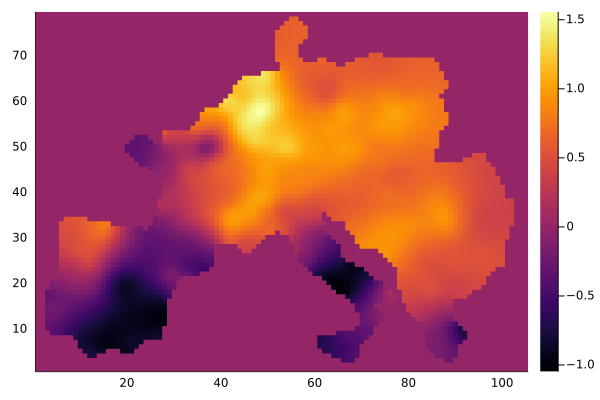

In [37]:
t = back_to_2d(isgrid, Ny, Nx, thetas);
heatmap(t[:,:,1])